<h2 style="color: #327a81;">Libraries</h2>

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings('ignore') 

import re
import nltk
from nltk.corpus import stopwords

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [2]:
!pip install sentiment-analysis-spanish

from sentiment_analysis_spanish import sentiment_analysis

<h2 style="color: #327a81;">Boyero Dataset</h2>

In [3]:
data = pd.read_csv("boyero_2020_2024.csv")

In [4]:
df = data.copy()

In [5]:
df

,header,paragraph,date
0,‘El mal no existe’: ecologismo a ritmo lento,Ryûsuke Hamaguchi recibió mogollón de nominaci...,2024-05-01
1,Nadie se acostumbra a su eterno genocidio,Viendo el infierno que arde en tantos lugares ...,2024-04-27
2,‘El especialista’: un producto previsible y pr...,La nueva película de David Leitch me pareció u...,2024-04-26
3,Qué cambalache el de cierto arte moderno. Y qu...,Disfruto en medio de tanta y bien pagada corre...,2024-04-20
4,‘Civil War’: viajando a través del espanto en ...,"Todas las contiendas son salvajes, pero las ci...",2024-04-19
...,...,...,...
405,El virtuosismo filmando la angustia y el miedo,"Sam Mendes, para transmitir esta historia de m...",2020-01-12
406,El virtuosismo filmando la angustia y el miedo,"Sam Mendes, para transmitir esta historia de m...",2020-01-10
407,Publicidad,Me sulfura tanto la publicidad que estoy conve...,2020-01-11
408,El Parlamento,La imagen más memorable y épica que tengo del ...,2020-01-08


In [6]:
df.isnull().sum()

header       0
paragraph    0
date         0
dtype: int64

<h2 style="color: #327a81;">NLP Preprocessing</h2>

<h3 style="color: #60b671;">"header", "paragraph" cleaning to tags</h3>

In [7]:
stop_words = list(stopwords.words("spanish"))

In [8]:
stop_words.extend(["según", "ahora", "después", "todas", "toda", "todo", "todos", "sólo", "solo", "sido", "están",
                   "estan", "hacer", "hecho", "puede", "tras", "cabe", "bajo", "durante", "mediante", "cada", "me",
                  "lunes", "martes", "miércoles", "jueves", "viernes", "sabado", "domingo"])

In [9]:
def text_cleaner(text):
    words = []
    for word in gensim.utils.simple_preprocess(text):
        if word not in gensim.parsing.preprocessing.STOPWORDS and word not in stop_words and len(word) >= 3:
            words.append(word)
    return words

In [10]:
header = df["header"]

In [11]:
header_tags = []

for ele in header:
    cleaned_header = text_cleaner(ele)
    header_tags.append(cleaned_header)

In [12]:
df["header_tags"] = header_tags

In [13]:
paragraph = df["paragraph"]

In [14]:
paragraph_tags = []

for ele in paragraph:
    cleaned_paragraph = text_cleaner(ele)
    paragraph_tags.append(cleaned_paragraph)

In [15]:
df["paragraph_tags"] = paragraph_tags

In [16]:
df.head(5)

,header,paragraph,date,header_tags,paragraph_tags
0,‘El mal no existe’: ecologismo a ritmo lento,Ryûsuke Hamaguchi recibió mogollón de nominaci...,2024-05-01,"[mal, existe, ecologismo, ritmo, lento]","[ryûsuke, hamaguchi, recibió, mogollón, nomina..."
1,Nadie se acostumbra a su eterno genocidio,Viendo el infierno que arde en tantos lugares ...,2024-04-27,"[nadie, acostumbra, eterno, genocidio]","[viendo, infierno, arde, tantos, lugares, univ..."
2,‘El especialista’: un producto previsible y pr...,La nueva película de David Leitch me pareció u...,2024-04-26,"[especialista, producto, previsible, prescindi...","[nueva, película, david, leitch, pareció, idio..."
3,Qué cambalache el de cierto arte moderno. Y qu...,Disfruto en medio de tanta y bien pagada corre...,2024-04-20,"[cambalache, cierto, arte, moderno, risa]","[disfruto, medio, tanta, bien, pagada, correcc..."
4,‘Civil War’: viajando a través del espanto en ...,"Todas las contiendas son salvajes, pero las ci...",2024-04-19,"[civil, war, viajando, través, espanto, improb...","[contiendas, salvajes, civiles, añaden, compon..."


<h3 style="color: #60b671;">tags to processed texts for ML</h3>

In [17]:

header_ml = []

for tag in header_tags:
    header_sum = " ".join(tag)
    header_ml.append(header_sum)

In [18]:
df["header_ml"] = header_ml

In [19]:
header_ml_temp = df.pop("header_ml")

In [20]:
df.insert(loc=4, column="header_ml", value=header_ml_temp)

In [21]:
paragraph_ml = []

for tag in paragraph_tags:
    paragraph_sum = " ".join(tag)
    paragraph_ml.append(paragraph_sum)

In [22]:
df["paragraph_ml"] = paragraph_ml

In [23]:
df.head(5)

,header,paragraph,date,header_tags,header_ml,paragraph_tags,paragraph_ml
0,‘El mal no existe’: ecologismo a ritmo lento,Ryûsuke Hamaguchi recibió mogollón de nominaci...,2024-05-01,"[mal, existe, ecologismo, ritmo, lento]",mal existe ecologismo ritmo lento,"[ryûsuke, hamaguchi, recibió, mogollón, nomina...",ryûsuke hamaguchi recibió mogollón nominacione...
1,Nadie se acostumbra a su eterno genocidio,Viendo el infierno que arde en tantos lugares ...,2024-04-27,"[nadie, acostumbra, eterno, genocidio]",nadie acostumbra eterno genocidio,"[viendo, infierno, arde, tantos, lugares, univ...",viendo infierno arde tantos lugares universo a...
2,‘El especialista’: un producto previsible y pr...,La nueva película de David Leitch me pareció u...,2024-04-26,"[especialista, producto, previsible, prescindi...",especialista producto previsible prescindible ...,"[nueva, película, david, leitch, pareció, idio...",nueva película david leitch pareció idiotez in...
3,Qué cambalache el de cierto arte moderno. Y qu...,Disfruto en medio de tanta y bien pagada corre...,2024-04-20,"[cambalache, cierto, arte, moderno, risa]",cambalache cierto arte moderno risa,"[disfruto, medio, tanta, bien, pagada, correcc...",disfruto medio tanta bien pagada corrección po...
4,‘Civil War’: viajando a través del espanto en ...,"Todas las contiendas son salvajes, pero las ci...",2024-04-19,"[civil, war, viajando, través, espanto, improb...",civil war viajando través espanto improbable g...,"[contiendas, salvajes, civiles, añaden, compon...",contiendas salvajes civiles añaden componente ...


<h3 style="color: #60b671;">Tag frequency</h3>

In [24]:
total_tags = []

for tags_list in df["header_tags"] + df["paragraph_tags"]:
    for tag in tags_list:
        total_tags.append(tag)

In [25]:
boyero_tags_count = pd.DataFrame(total_tags)

In [26]:
boyero_tags_count = boyero_tags_count.value_counts()

In [27]:
boyero_tags_count.head(50)

película      58
tan           55
cine          44
director      24
historia      23
películas     22
vida          21
ser           21
años          21
aunque        20
siempre       19
gente         18
televisión    17
ver           16
cosas         16
nueva         15
casi          15
gran          14
serie         13
amor          13
bien          13
forma         13
política      13
gracia        13
dos           12
hace          12
momento       12
miedo         12
visual        11
personajes    11
ocurre        11
mejor         11
señor         11
arte          11
sensación     10
veces         10
menos         10
estilo        10
vez           10
posee         10
cómo          10
hombre        10
mundo         10
parte         10
veo            9
pueden         9
david          9
viendo         9
cámara         9
llamado        9
Name: count, dtype: int64

<h2 style="color: #327a81;">Text Sentiment Analysis</h2>

<h3 style="color: #60b671;">Header sentiment</h3>

In [28]:
sia = sentiment_analysis.SentimentAnalysisSpanish()

In [29]:
sentiment_header = []

for index, row in df.iterrows():
    sentiment_header.append(sia.sentiment(row["header_ml"]))

In [30]:
df["numerical_header_sentiment"] = sentiment_header

In [31]:
header_sentiment_segmented = []

for x in sentiment_header:
    if x <= 0.2:
        header_sentiment_segmented.append("Extremadamente Negativo")
    elif x <= 0.4 and x > 0.2:
        header_sentiment_segmented.append("Negativo")
    elif x <= 0.6 and x > 0.4:
        header_sentiment_segmented.append("Neutral")
    elif x <= 0.8 and x > 0.6:
        header_sentiment_segmented.append("Positivo")
    elif x <= 1 and x > 0.8:
        header_sentiment_segmented.append("Extremadamente Positivo")

In [32]:
df["header_sentiment"] = header_sentiment_segmented

<h3 style="color: #60b671;">Paragraph sentiment</h3>

In [33]:
sentiment_paragraph = []

for index, row in df.iterrows():
    sentiment_paragraph.append(sia.sentiment(row["paragraph_ml"]))

In [34]:
df["numerical_paragraph_sentiment"] = sentiment_paragraph

In [35]:
paragraph_sentiment_segmented = []

for x in sentiment_paragraph:
    if x <= 0.2:
        paragraph_sentiment_segmented.append("Extremadamente Negativo")
    elif x <= 0.4 and x > 0.2:
        paragraph_sentiment_segmented.append("Negativo")
    elif x <= 0.6 and x > 0.4:
        paragraph_sentiment_segmented.append("Neutral")
    elif x <= 0.8 and x > 0.6:
        paragraph_sentiment_segmented.append("Positivo")
    elif x <= 1 and x > 0.8:
        paragraph_sentiment_segmented.append("Extremadamente Positivo")

In [36]:
df["paragraph_sentiment"] = paragraph_sentiment_segmented

In [37]:
df

,header,paragraph,date,header_tags,header_ml,paragraph_tags,paragraph_ml,numerical_header_sentiment,header_sentiment,numerical_paragraph_sentiment,paragraph_sentiment
0,‘El mal no existe’: ecologismo a ritmo lento,Ryûsuke Hamaguchi recibió mogollón de nominaci...,2024-05-01,"[mal, existe, ecologismo, ritmo, lento]",mal existe ecologismo ritmo lento,"[ryûsuke, hamaguchi, recibió, mogollón, nomina...",ryûsuke hamaguchi recibió mogollón nominacione...,0.005730,Extremadamente Negativo,0.006328,Extremadamente Negativo
1,Nadie se acostumbra a su eterno genocidio,Viendo el infierno que arde en tantos lugares ...,2024-04-27,"[nadie, acostumbra, eterno, genocidio]",nadie acostumbra eterno genocidio,"[viendo, infierno, arde, tantos, lugares, univ...",viendo infierno arde tantos lugares universo a...,0.042256,Extremadamente Negativo,0.110846,Extremadamente Negativo
2,‘El especialista’: un producto previsible y pr...,La nueva película de David Leitch me pareció u...,2024-04-26,"[especialista, producto, previsible, prescindi...",especialista producto previsible prescindible ...,"[nueva, película, david, leitch, pareció, idio...",nueva película david leitch pareció idiotez in...,0.106501,Extremadamente Negativo,0.000002,Extremadamente Negativo
3,Qué cambalache el de cierto arte moderno. Y qu...,Disfruto en medio de tanta y bien pagada corre...,2024-04-20,"[cambalache, cierto, arte, moderno, risa]",cambalache cierto arte moderno risa,"[disfruto, medio, tanta, bien, pagada, correcc...",disfruto medio tanta bien pagada corrección po...,0.894740,Extremadamente Positivo,0.083657,Extremadamente Negativo
4,‘Civil War’: viajando a través del espanto en ...,"Todas las contiendas son salvajes, pero las ci...",2024-04-19,"[civil, war, viajando, través, espanto, improb...",civil war viajando través espanto improbable g...,"[contiendas, salvajes, civiles, añaden, compon...",contiendas salvajes civiles añaden componente ...,0.338289,Negativo,0.080884,Extremadamente Negativo
...,...,...,...,...,...,...,...,...,...,...,...
405,El virtuosismo filmando la angustia y el miedo,"Sam Mendes, para transmitir esta historia de m...",2020-01-12,"[virtuosismo, filmando, angustia, miedo]",virtuosismo filmando angustia miedo,"[sam, mendes, transmitir, historia, miedo, bar...",sam mendes transmitir historia miedo barro mug...,0.497892,Neutral,0.504743,Neutral
406,El virtuosismo filmando la angustia y el miedo,"Sam Mendes, para transmitir esta historia de m...",2020-01-10,"[virtuosismo, filmando, angustia, miedo]",virtuosismo filmando angustia miedo,"[sam, mendes, transmitir, historia, miedo, bar...",sam mendes transmitir historia miedo barro mug...,0.497892,Neutral,0.504743,Neutral
407,Publicidad,Me sulfura tanto la publicidad que estoy conve...,2020-01-11,[publicidad],publicidad,"[sulfura, publicidad, convencido, mensajes, af...",sulfura publicidad convencido mensajes afectan...,0.497892,Neutral,0.161552,Extremadamente Negativo
408,El Parlamento,La imagen más memorable y épica que tengo del ...,2020-01-08,[parlamento],parlamento,"[imagen, memorable, épica, parlamento, adolfo,...",imagen memorable épica parlamento adolfo suáre...,0.497892,Neutral,0.187815,Extremadamente Negativo


<h2 style="color: #327a81;">Exploring Boyero's Sentiment Analysis</h2>

<h3 style="color: #60b671;">Headlines and Paragraphs counts</h3>

In [40]:
sent_header_label = df["header_sentiment"].value_counts()

In [41]:
sent_paragraph_label = df["paragraph_sentiment"].value_counts()

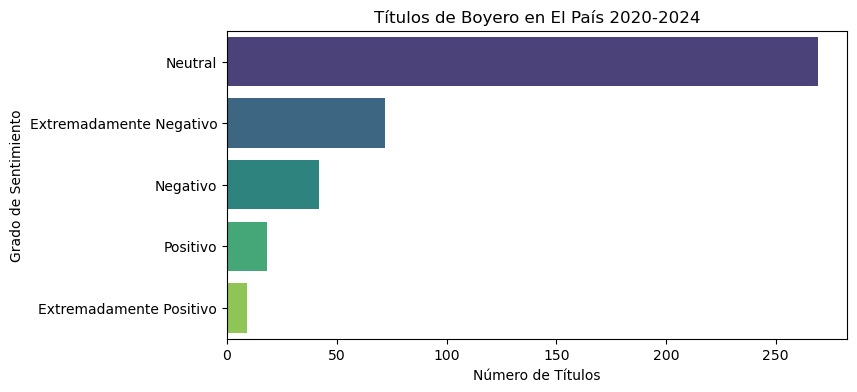

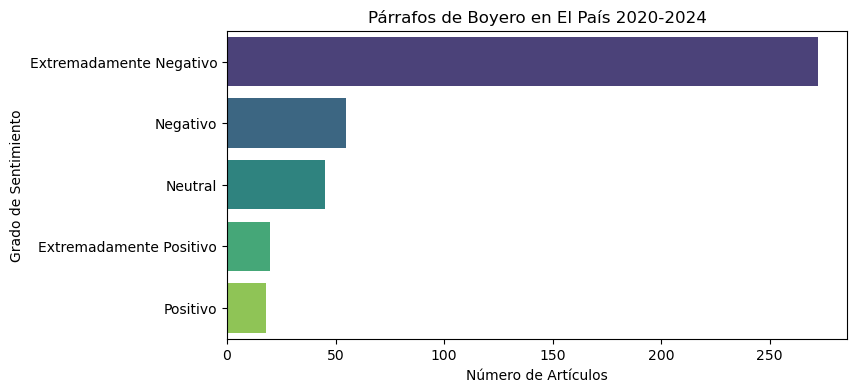

In [67]:
plt.figure(figsize=(8,4))

sns.barplot(y=sent_header_label.index, x=sent_header_label.values, palette="viridis")
plt.title("Títulos de Boyero en El País 2020-2024")
plt.xlabel("Número de Títulos")
plt.ylabel("Grado de Sentimiento")
plt.show()

plt.figure(figsize=(8,4))

sns.barplot(y=sent_paragraph_label.index, x=sent_paragraph_label.values, palette="viridis")
plt.title("Párrafos de Boyero en El País 2020-2024")
plt.xlabel("Número de Artículos")
plt.ylabel("Grado de Sentimiento")
plt.show()

<h3 style="color: #60b671;">Which are the most extreme items?</h3>

In [100]:
sent_header_min = list(df["numerical_header_sentiment"].sort_values().head(5))
sent_header_min

[0.00023665840576344088,
 0.000681156832975307,
 0.000995867906753585,
 0.0027894910718434486,
 0.004922350312152798]

In [129]:
df["header"][df["numerical_header_sentiment"].isin(sent_header_min)]

46     ‘Saben aquell’: cine creíble, triste y bonito ...
50                                      ¿Peor imposible?
181    ‘La peor persona del mundo’: pasa la vida y el...
240                Lamentable panorama del cine de autor
250           El buen rollo de los latinos en Nueva York
Name: header, dtype: object

In [105]:
sent_paragraph_min = list(df["numerical_paragraph_sentiment"].sort_values().head(5))
sent_paragraph_min

[9.366849219858294e-07,
 1.5744118981622118e-06,
 1.8554836680835343e-06,
 1.918083895297295e-06,
 1.92603837110089e-06]

In [128]:
df["paragraph"][df["numerical_paragraph_sentiment"].isin(sent_paragraph_min)]

2      La nueva película de David Leitch me pareció u...
99     La triste historia de esta mujer adicta, o la ...
173    El nuevo trabajo de Jacques Audiard provoca ci...
225    Autor de un cine social, inteligente y antipan...
227    El esplendor acompañó durante mucho tiempo al ...
Name: paragraph, dtype: object